In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

### Data Understanding

In [2]:
df=pd.read_csv("/home/sathish/Downloads/day (1).csv")

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
df.tail(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Basic information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.shape

(730, 16)

In [9]:
'instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt'

('instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt')

### Unique value for every columns

In [10]:
columns_to_impute=['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
for i in columns_to_impute:
    print("how many unique value for ",i," : ",df[i].nunique())

how many unique value for  instant  :  730
how many unique value for  dteday  :  730
how many unique value for  season  :  4
how many unique value for  yr  :  2
how many unique value for  mnth  :  12
how many unique value for  holiday  :  2
how many unique value for  weekday  :  7
how many unique value for  workingday  :  2
how many unique value for  weathersit  :  3
how many unique value for  temp  :  498
how many unique value for  atemp  :  689
how many unique value for  hum  :  594
how many unique value for  windspeed  :  649
how many unique value for  casual  :  605
how many unique value for  registered  :  678
how many unique value for  cnt  :  695


In [11]:
varlist=['season']

def binary_map(x):
    return x.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df[varlist]=df[varlist].apply(binary_map)

In [12]:
varlist=['weathersit']

def binary_map(x):
    return x.map({1:"Clear",2:"Misty",3:"Light Snow or Rain",4:"Heavy Snow or Rain"})
df[varlist]=df[varlist].apply(binary_map)

In [13]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Spring,1,12,0,4,1,Misty,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Spring,1,12,0,5,1,Misty,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Spring,1,12,0,6,0,Misty,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Spring,1,12,0,0,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [14]:
varlist=['season']

def binary_map(x):
    return x.map({"Spring":0,"Summer":1,"Fall":2,"Winter":3})
df[varlist]=df[varlist].apply(binary_map)

In [15]:
varlist=['weathersit']

def binary_map(x):
    return x.map({"Clear":0,"Misty":1,"Light Snow or Rain":2,"Heavy Snow or Rain":3})
df[varlist]=df[varlist].apply(binary_map)

In [16]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,0,0,1,0,6,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,0,0,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,0,0,1,0,1,1,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,0,0,1,0,2,1,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,0,0,1,0,3,1,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,0,1,12,0,4,1,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,0,1,12,0,5,1,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,0,1,12,0,6,0,1,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,0,1,12,0,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['mnth'] = label_encoder.fit_transform(df['mnth'])

In [18]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,0,0,0,0,6,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,0,0,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,0,0,0,0,1,1,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,0,0,0,0,2,1,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,0,0,0,0,3,1,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,0,1,11,0,4,1,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,0,1,11,0,5,1,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,0,1,11,0,6,0,1,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,0,1,11,0,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Missing values in the dataset

In [19]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Describe value for Numerical columns

In [20]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,1.498630,0.500000,5.526027,0.028767,2.997260,0.683562,0.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2.000000,0.500000,6.000000,0.000000,3.000000,1.000000,0.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2.000000,1.000000,9.000000,0.000000,5.000000,1.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,3.000000,1.000000,11.000000,1.000000,6.000000,1.000000,2.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Drop the unwanted columns

In [21]:
columns_to_drop = ["instant","dteday","casual","registered"]
df=df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [22]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,6,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,1,1,0,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,2,1,0,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,3,1,0,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,11,0,4,1,1,10.420847,11.33210,65.2917,23.458911,2114
726,0,1,11,0,5,1,1,10.386653,12.75230,59.0000,10.416557,3095
727,0,1,11,0,6,0,1,10.386653,12.12000,75.2917,8.333661,1341
728,0,1,11,0,0,0,0,10.489153,11.58500,48.3333,23.500518,1796


### Heatmap

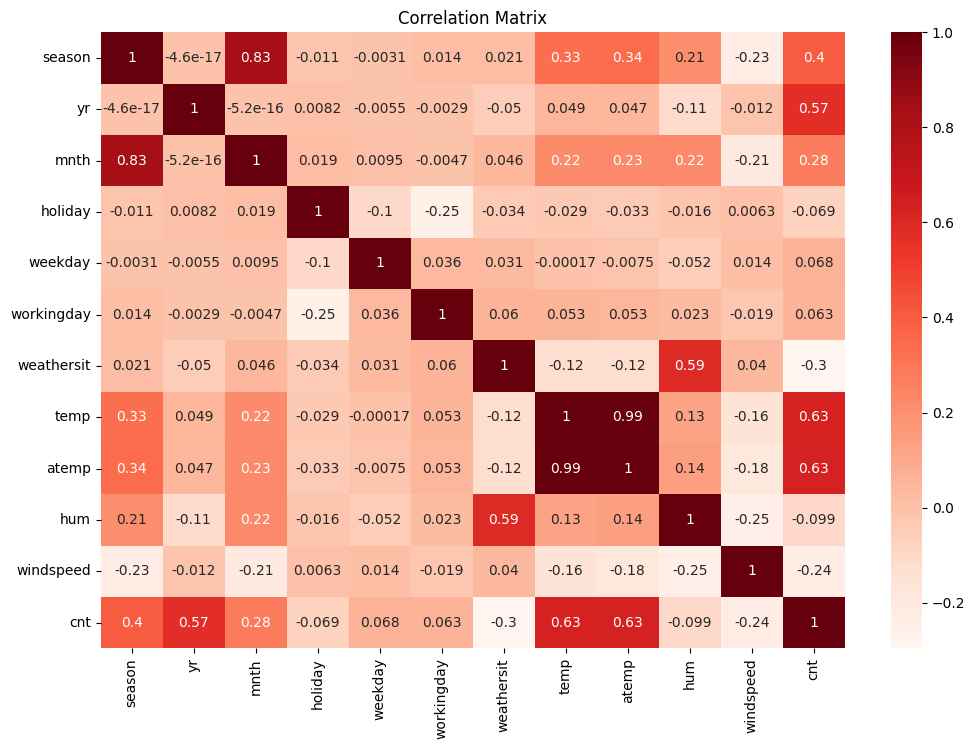

In [23]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

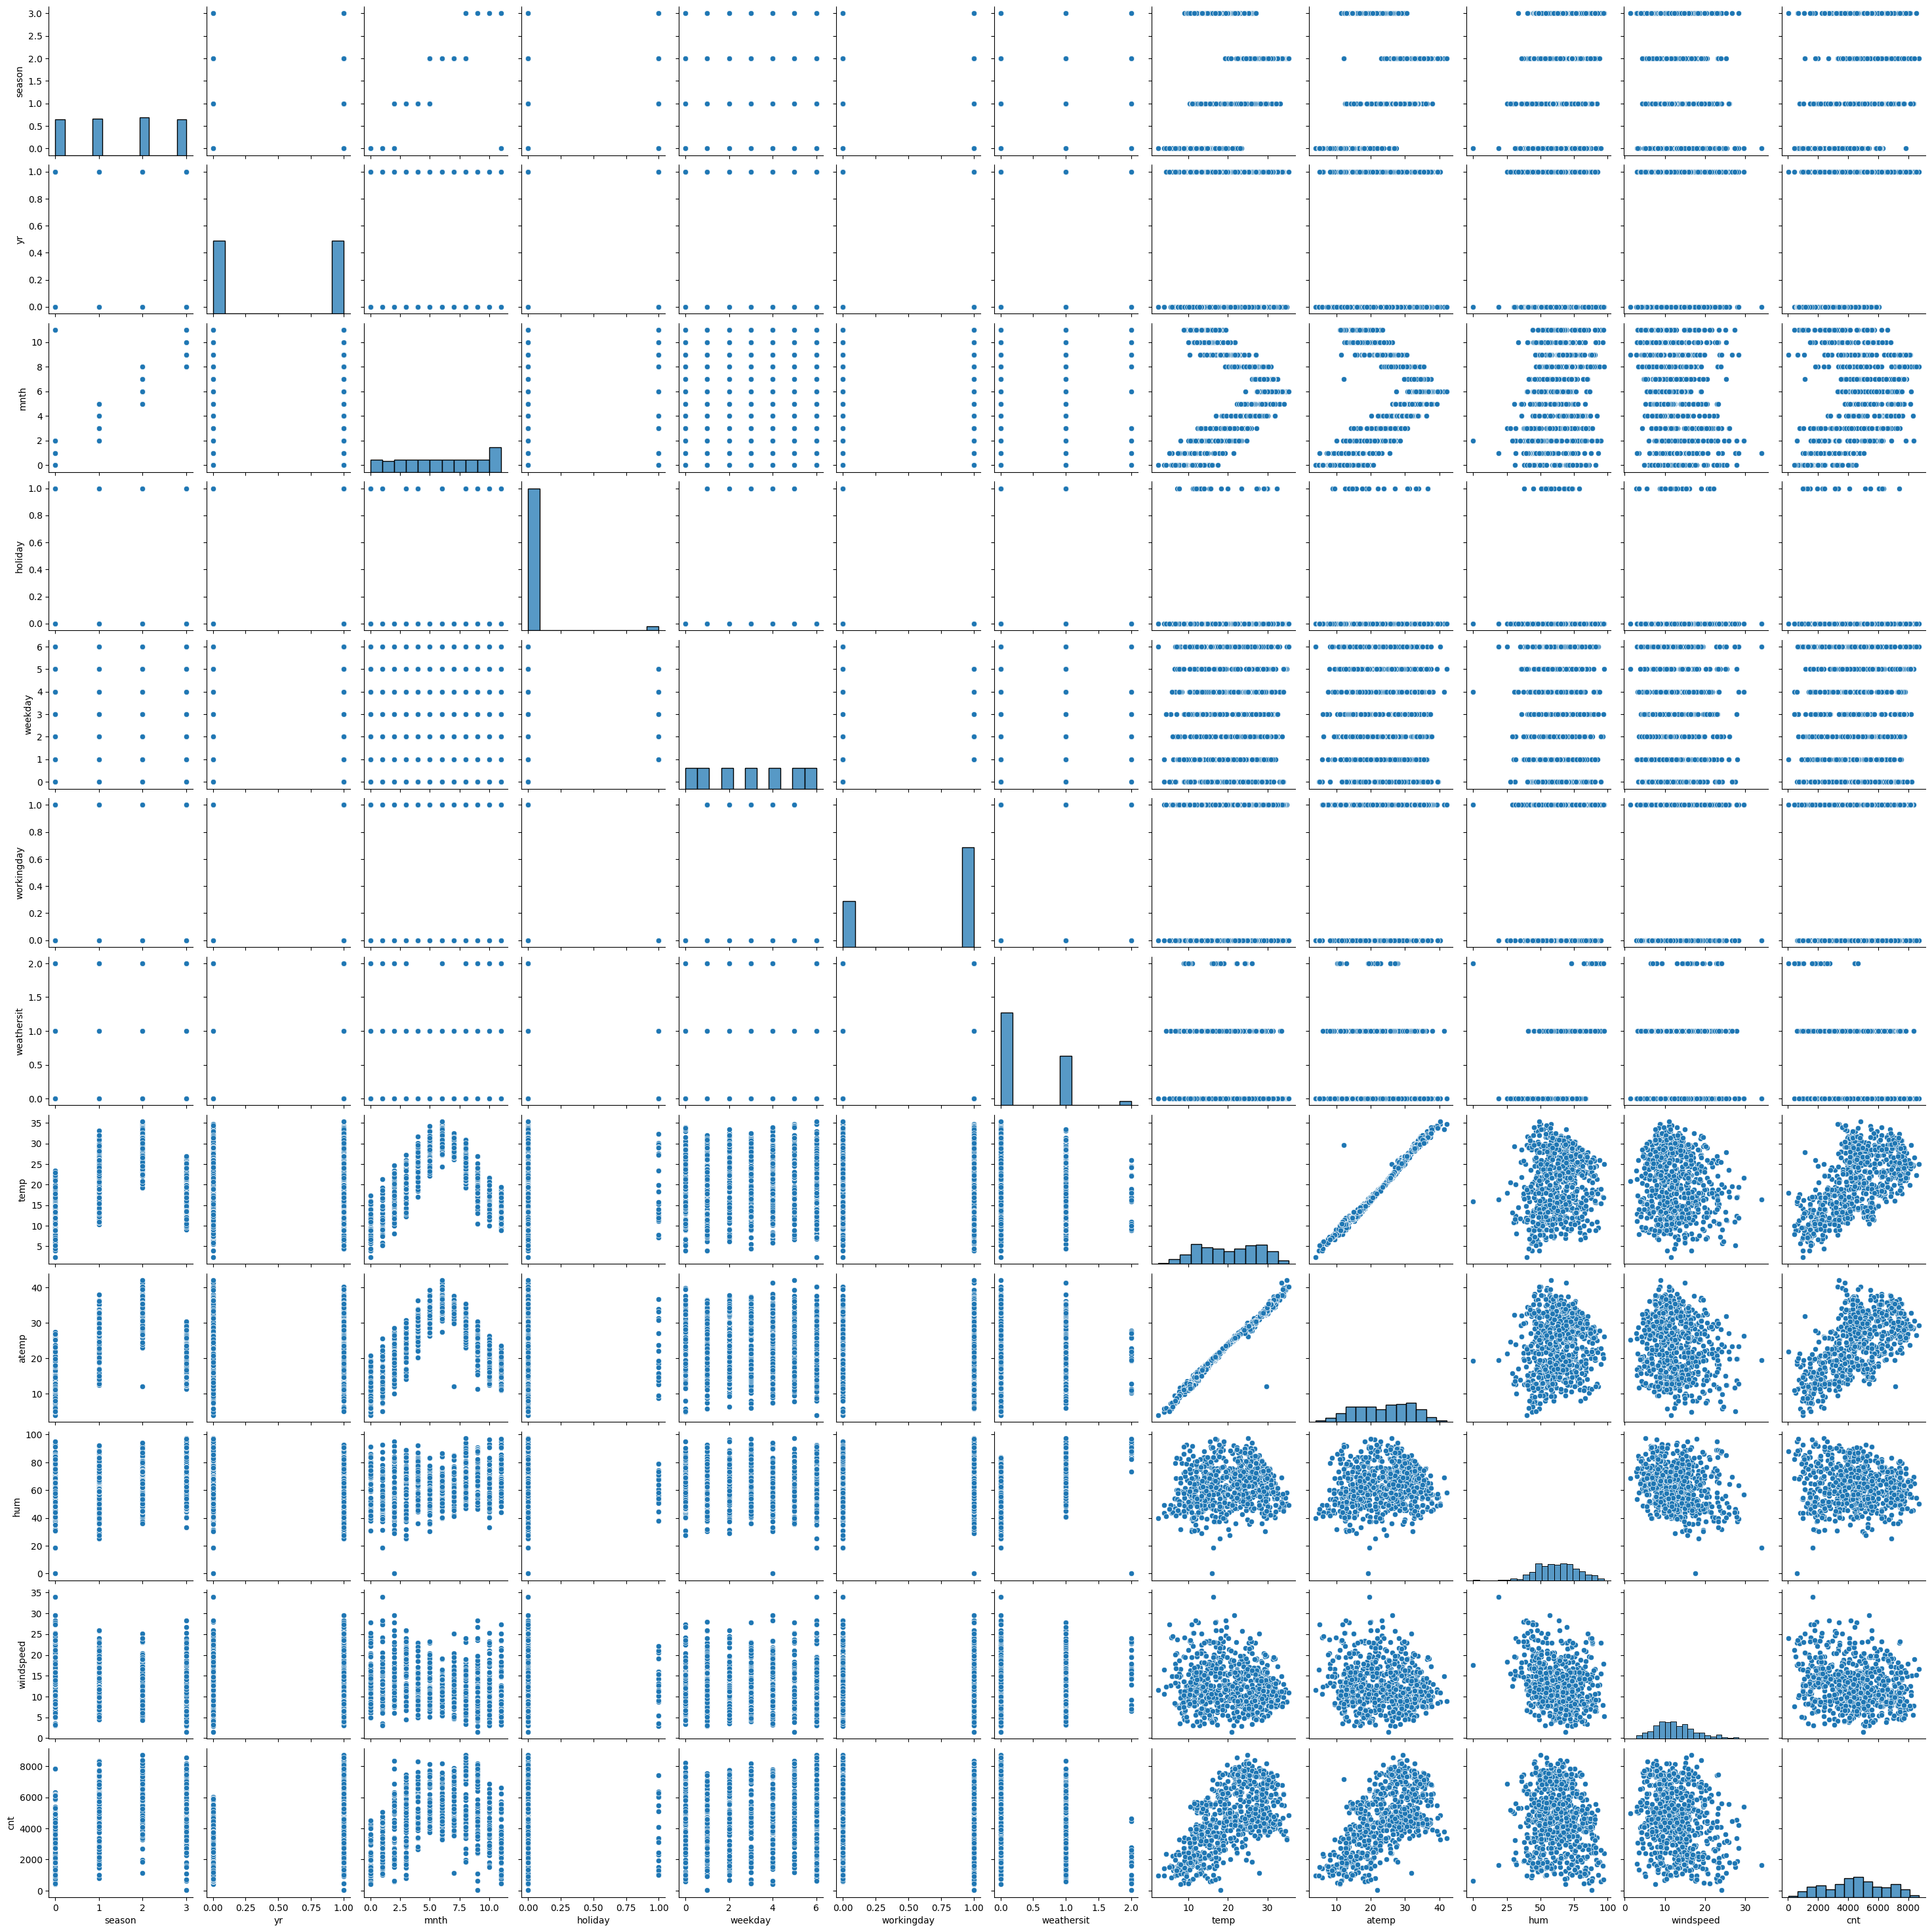

In [24]:
sns.pairplot(df)

In [26]:
x=df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

### Check for Outliers

<Axes: >

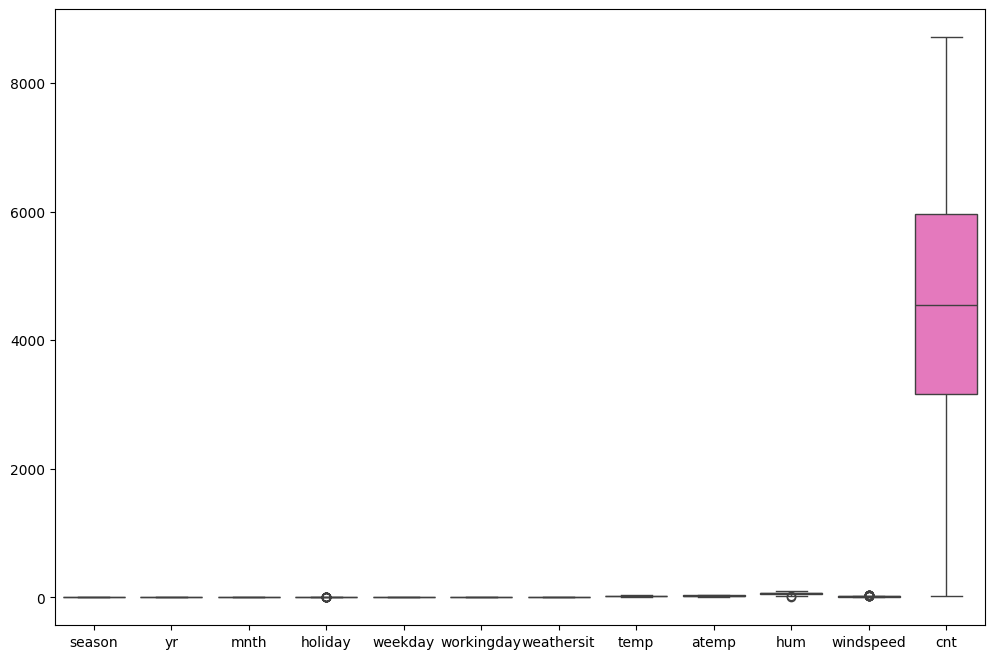

In [27]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(x)

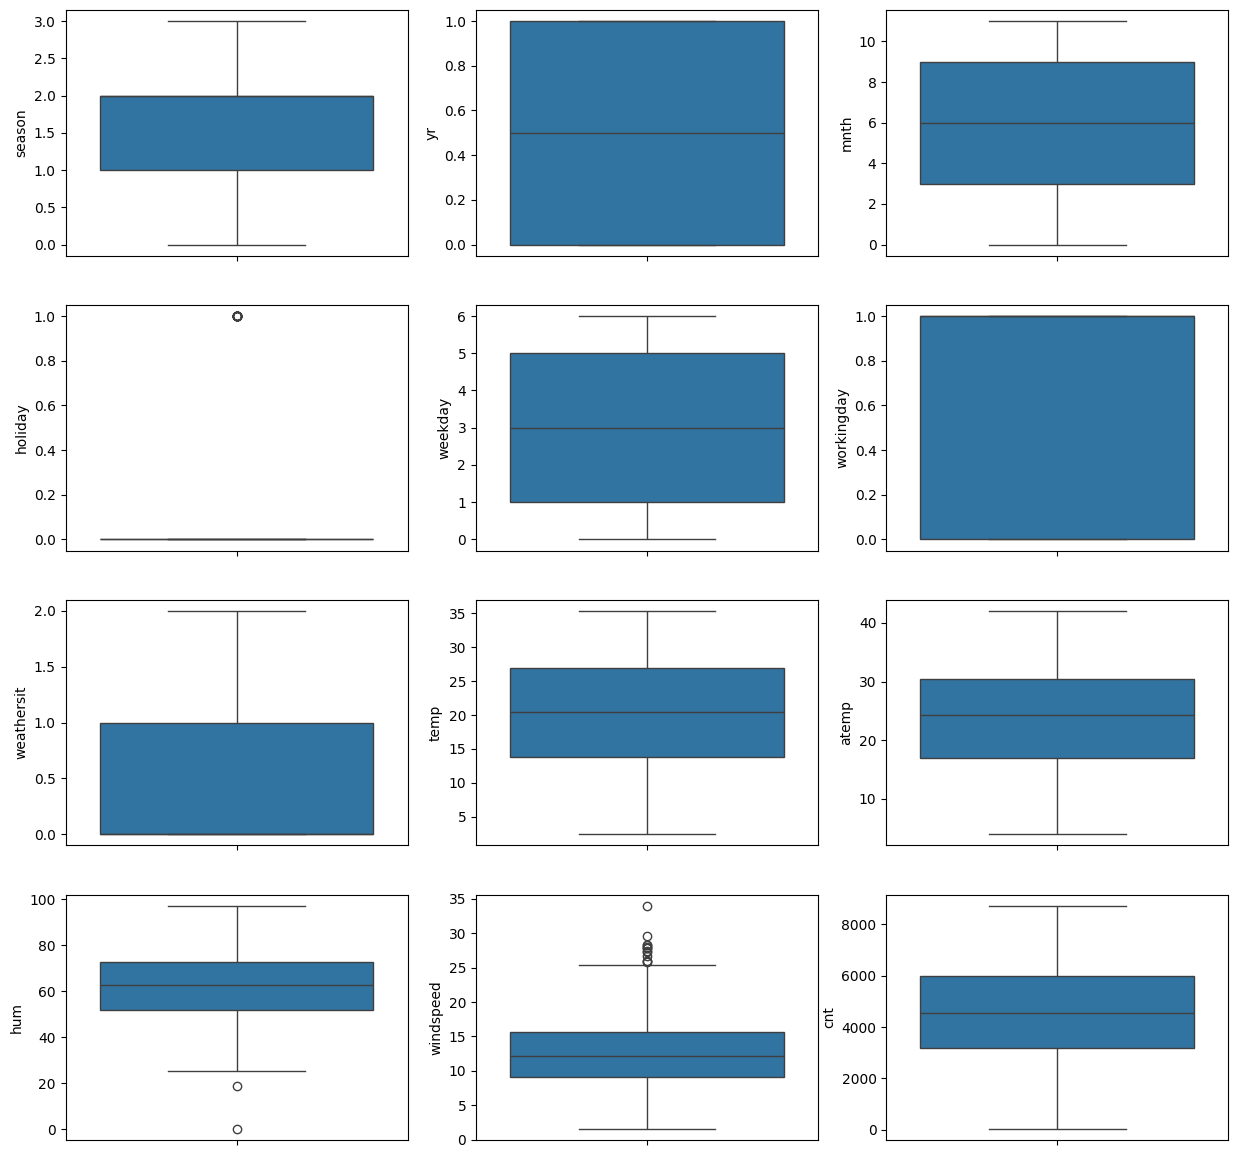

In [28]:
plt.figure(figsize=(15,30))
for i in range(len(x.columns)):
    plt.subplot(8,3,i+1)
    sns.boxplot(y=x.columns[i],data=x)
plt.show()

/tmp/ipykernel_16204/3095626935.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'])


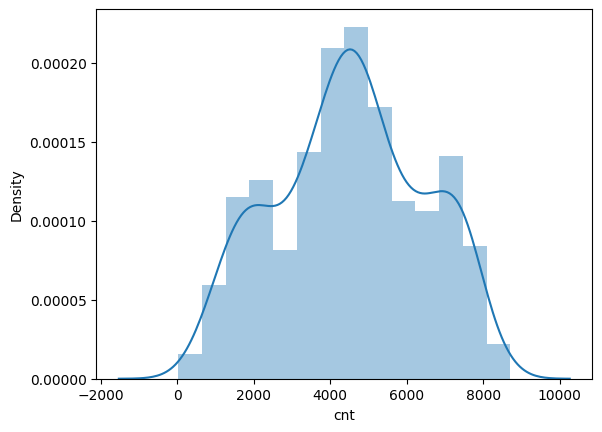

In [29]:
sns.distplot(df['cnt'])
plt.show()

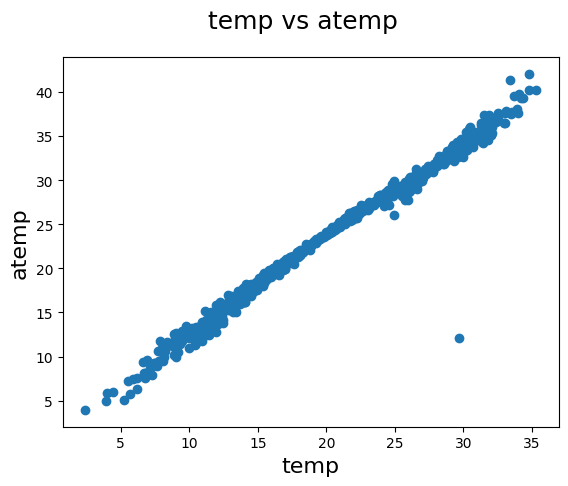

In [30]:
fig=plt.figure()
plt.scatter(df['temp'],df['atemp'])
fig.suptitle('temp vs atemp',fontsize=18)
plt.xlabel('temp',fontsize=16)
plt.ylabel('atemp',fontsize=16)
plt.show()

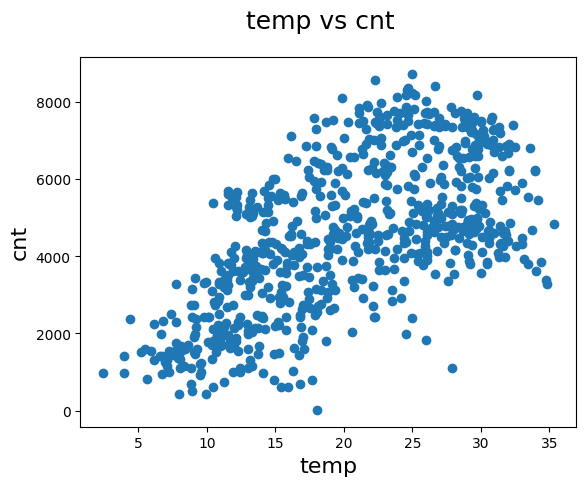

In [31]:
fig=plt.figure()
plt.scatter(df['temp'],df['cnt'])
fig.suptitle('temp vs cnt',fontsize=18)
plt.xlabel('temp',fontsize=16)
plt.ylabel('cnt',fontsize=16)
plt.show()

## Model Building

In [33]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,6,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,1,1,0,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,2,1,0,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,3,1,0,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
df.shape

(730, 12)

In [35]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### manual feature selection

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
y_train=df_train.pop('cnt')
x_train=df_train

In [39]:
import statsmodels.api as sm
x_train=sm.add_constant(df_train)

In [40]:
x_train

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
683,1.0,3,1,10,0,4,1,1,13.188347,16.22460,62.0417,10.250129
645,1.0,3,1,9,1,1,0,1,15.716653,19.38040,70.9583,12.708493
163,1.0,1,0,5,0,1,1,0,26.035000,30.08270,49.4583,20.458450
360,1.0,0,0,11,0,2,1,1,13.325000,16.38165,76.2500,12.626150
640,1.0,3,1,9,0,3,1,1,26.957500,29.95665,79.3750,4.458569
...,...,...,...,...,...,...,...,...,...,...,...,...
700,1.0,3,1,11,0,0,0,1,14.247500,17.96040,82.3333,8.333393
71,1.0,0,0,2,0,0,0,0,15.758268,19.00455,52.7391,18.130468
106,1.0,1,0,3,0,0,0,0,18.723347,22.28480,47.9583,20.334232
270,1.0,3,0,8,0,3,1,1,26.035000,28.75790,84.8750,9.958143


In [41]:
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     177.7
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.79e-164
Time:                        12:41:34   Log-Likelihood:                -4176.9
No. Observations:                 510   AIC:                             8378.
Df Residuals:                     498   BIC:                             8429.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        996.6153    332.889      2.994      0.0

In [42]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
9,atemp,169.22
8,temp,165.98
0,const,72.54
1,season,3.57
3,mnth,3.36
10,hum,1.84
7,weathersit,1.70
11,windspeed,1.28
4,holiday,1.09
6,workingday,1.08


In [43]:
columns_to_drop = ["atemp"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     192.3
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.55e-164
Time:                        12:41:51   Log-Likelihood:                -4180.6
No. Observations:                 510   AIC:                             8383.
Df Residuals:                     499   BIC:                             8430.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1338.6890    309.643      4.323      0.0

In [44]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,61.98
1,season,3.56
3,mnth,3.36
9,hum,1.82
7,weathersit,1.68
8,temp,1.22
10,windspeed,1.19
4,holiday,1.09
6,workingday,1.08
2,yr,1.02


In [45]:
columns_to_drop = ["const"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1481.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:45:22   Log-Likelihood:                         -4190.0
No. Observations:                 510   AIC:                                      8400.
Df Residuals:                     500   BIC:                                      8442.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
8,hum,17.00
2,mnth,12.23
0,season,10.38
7,temp,9.89
9,windspeed,5.29
5,workingday,3.12
4,weekday,3.02
6,weathersit,2.16
1,yr,2.03
3,holiday,1.10


In [47]:
columns_to_drop = ["hum"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1644.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:45:45   Log-Likelihood:                         -4190.7
No. Observations:                 510   AIC:                                      8399.
Df Residuals:                     501   BIC:                                      8437.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,mnth,11.50
0,season,10.32
7,temp,7.15
8,windspeed,4.68
5,workingday,3.00
4,weekday,2.93
1,yr,2.03
6,weathersit,1.56
3,holiday,1.08


In [49]:
columns_to_drop = ["mnth"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1839.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:46:00   Log-Likelihood:                         -4192.6
No. Observations:                 510   AIC:                                      8401.
Df Residuals:                     502   BIC:                                      8435.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
6,temp,7.13
7,windspeed,4.60
0,season,3.29
4,workingday,3.00
3,weekday,2.91
1,yr,2.02
5,weathersit,1.54
2,holiday,1.07


In [51]:
columns_to_drop = ["temp"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              786.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                   3.37e-266
Time:                        12:46:09   Log-Likelihood:                         -4430.1
No. Observations:                 510   AIC:                                      8874.
Df Residuals:                     503   BIC:                                      8904.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
6,windspeed,3.88
3,weekday,2.81
4,workingday,2.72
0,season,2.46
1,yr,1.97
5,weathersit,1.54
2,holiday,1.06


In [53]:
columns_to_drop = ["holiday"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              918.8
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                   1.11e-267
Time:                        12:46:18   Log-Likelihood:                         -4430.1
No. Observations:                 510   AIC:                                      8872.
Df Residuals:                     504   BIC:                                      8898.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
5,windspeed,3.81
2,weekday,2.80
3,workingday,2.64
0,season,2.45
1,yr,1.96
4,weathersit,1.54


In [55]:
y_train

683    5445
645    5478
163    5020
360    1162
640    7572
       ... 
700    4649
71     2417
106    3744
270    3907
435    5298
Name: cnt, Length: 510, dtype: int64

In [56]:
x_train

,season,yr,weekday,workingday,weathersit,windspeed
683,3,1,4,1,1,10.250129
645,3,1,1,0,1,12.708493
163,1,0,1,1,0,20.458450
360,0,0,2,1,1,12.626150
640,3,1,3,1,1,4.458569
...,...,...,...,...,...,...
700,3,1,0,0,1,8.333393
71,0,0,0,0,0,18.130468
106,1,0,0,0,0,20.334232
270,3,0,3,1,1,9.958143


In [57]:
# model evaluation
y_pred_train=lm.predict(x_train)

In [58]:
#mean squared error and R-squared for model evaluation
mse_train=mean_squared_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)

In [59]:
print(mse_train)
print(r2_train)

2053840.7466188178
0.4517683704850587


In [63]:
import statsmodels.api as sm

In [64]:
import statsmodels.api as sm

## RFE method

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
data=pd.read_csv("/home/sathish/Downloads/day (1).csv")

In [67]:
varlist=['season']

def binary_map(x):
    return x.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df[varlist]=data[varlist].apply(binary_map)

In [68]:
varlist=['weathersit']

def binary_map(x):
    return x.map({1:"Clear",2:"Misty",3:"Light Snow or Rain",4:"Heavy Snow or Rain"})
df[varlist]=data[varlist].apply(binary_map)

In [69]:
varlist=['season']

def binary_map(x):
    return x.map({"Spring":0,"Summer":1,"Fall":2,"Winter":3})
df[varlist]=data[varlist].apply(binary_map)

In [70]:
varlist=['weathersit']

def binary_map(x):
    return x.map({"Clear":0,"Misty":1,"Light Snow or Rain":2,"Heavy Snow or Rain":3})
df[varlist]=data[varlist].apply(binary_map)

In [71]:
columns_to_drop = ["instant","dteday","casual"]
data1=data.drop(columns=[col for col in columns_to_drop if col in data.columns])

In [72]:
data1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1432,1796


In [73]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(data1,train_size=0.7,test_size=0.3,random_state=42)

In [74]:
y_train2=df_train.pop('cnt')
x_train2=df_train

In [75]:
lm1=LinearRegression()
lm1.fit(x_train2,y_train2)
rfe1=RFE(estimator=lm1,n_features_to_select=7)
rfe1=rfe1.fit(x_train2,y_train2)

In [76]:
list(zip(x_train2.columns,rfe1.support_,rfe1.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 4),
 ('registered', False, 6)]

In [77]:
col=x_train2.columns[rfe1.support_]
col

Index(['season', 'yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp'], dtype='object')

In [78]:
x_train1=x_train2[col]

In [79]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train1)
x_train_rfe

,const,season,yr,holiday,workingday,weathersit,temp,atemp
683,1.0,4,1,0,1,2,13.188347,16.22460
645,1.0,4,1,1,0,2,15.716653,19.38040
163,1.0,2,0,0,1,1,26.035000,30.08270
360,1.0,1,0,0,1,2,13.325000,16.38165
640,1.0,4,1,0,1,2,26.957500,29.95665
...,...,...,...,...,...,...,...,...
700,1.0,4,1,0,0,2,14.247500,17.96040
71,1.0,1,0,0,0,1,15.758268,19.00455
106,1.0,2,0,0,0,1,18.723347,22.28480
270,1.0,4,0,0,1,2,26.035000,28.75790


In [80]:
lm1=sm.OLS(y_train2,x_train_rfe).fit()

In [81]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     259.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.04e-162
Time:                        12:47:42   Log-Likelihood:                -4193.0
No. Observations:                 510   AIC:                             8402.
Df Residuals:                     502   BIC:                             8436.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        343.7276    213.674      1.609      0.1

In [82]:
y_train_pred=lm1.predict(x_train_rfe)

In [83]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

900.1342063365861

In [84]:
y_train

683    5445
645    5478
163    5020
360    1162
640    7572
       ... 
700    4649
71     2417
106    3744
270    3907
435    5298
Name: cnt, Length: 510, dtype: int64

In [85]:
y_train_pred

683    4866.147235
645    4537.418124
163    4390.029366
360    1569.834665
640    6427.315350
          ...     
700    4943.486282
71     2455.442496
106    3288.973853
270    4257.495389
435    5141.418802
Length: 510, dtype: float64

In [86]:
r_squared=r2_score(y_train,y_train_pred)
r_squared

0.7837222444835414

In [87]:
#mean squared error and R-squared for model evaluation
mse=mean_squared_error(y_train,y_train_pred)
r2=r2_score(y_train,y_train_pred)

In [88]:
r2

0.7837222444835414